<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

In [1]:
import pandas as pd
df = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("Test_input.csv")

In [2]:
df.head()

,id,tweet_content,harassment,IndirectH,PhysicalH,SexualH
0,9565,also released this video of photos voyager too...,0,0,0,0
1,6794,Yeah sexting older games until x89 teach doug...,0,0,0,0
2,4337,ava There s likely hundreds of stories like t...,0,0,0,0
3,6621,Wonder if there is significance to having Ava ...,0,0,0,0
4,3289,i m a slut for guacamole an avocadhoe if you will,0,0,0,0


In [3]:
df_test.head()

,id,tweet_content
0,1,is it wrong what about mezcal
1,2,is mkr on texts the sound you make with incaka...
2,3,is on now go girl bre
3,4,is only beaten by on anzac day eve k share which
4,5,is that a bowl cut on that chick


In [4]:
print("Filas:", df.shape[0])
print("Etiquetadas con Harassment == 1:", df[df.harassment == 1].shape[0])
print("Etiquetadas con Harassment == 0:", df[df.harassment == 0].shape[0])

Filas: 5703
Etiquetadas con Harassment == 1: 549
Etiquetadas con Harassment == 0: 5154


> El objetivo será encontrar un modelo (esperamos que de ensamblado) que obtenga mejor f1 score para el conjunto de validación, usando también métodos para tratar con datasets imbalanceados

In [5]:
from sklearn.model_selection import train_test_split
# Se separa input y output
y = df.harassment
X = df.tweet_content
X_test = df_test.tweet_content
# Se separa en training y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

> Preprocesamiento

In [7]:
texts_train = [text for text in X_train]
texts_val = [text for text in X_val]
texts_test = [text for text in X_test]

> CountVectorizer

In [8]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

> Comparación Árbol no regularizado y Árbol regularizado

Accuracy score árbol no regularizado: 0.9137447405329593
-----------------------------------------------


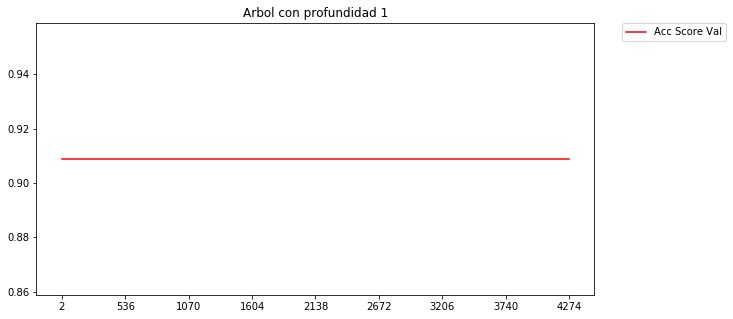

Mejor Acc Score: 0.908835904628331


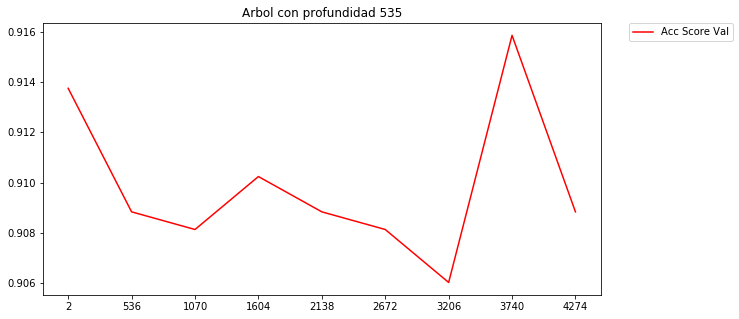

Mejor Acc Score: 0.9158485273492286


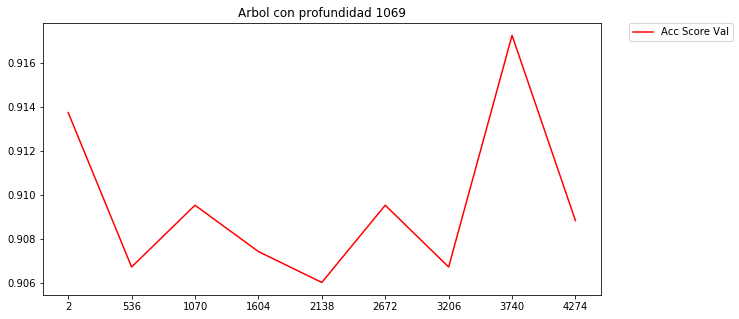

Mejor Acc Score: 0.9172510518934082


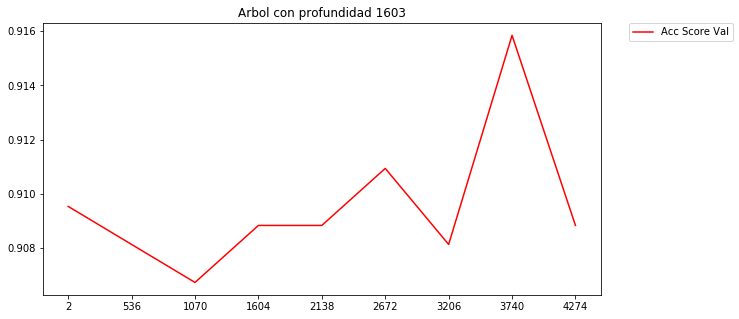

Mejor Acc Score: 0.9158485273492286


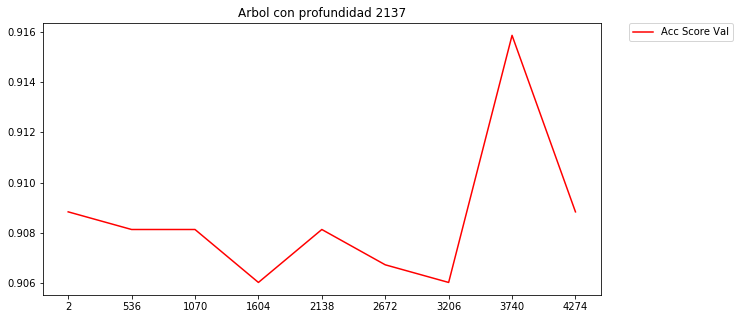

Mejor Acc Score: 0.9158485273492286


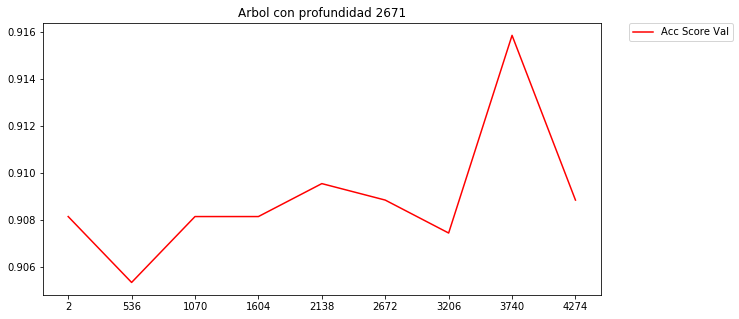

Mejor Acc Score: 0.9158485273492286


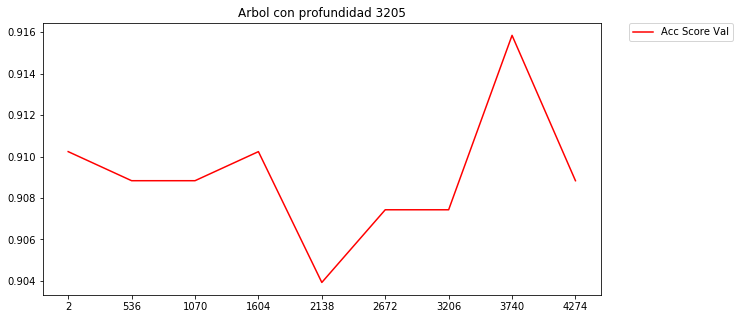

Mejor Acc Score: 0.9158485273492286


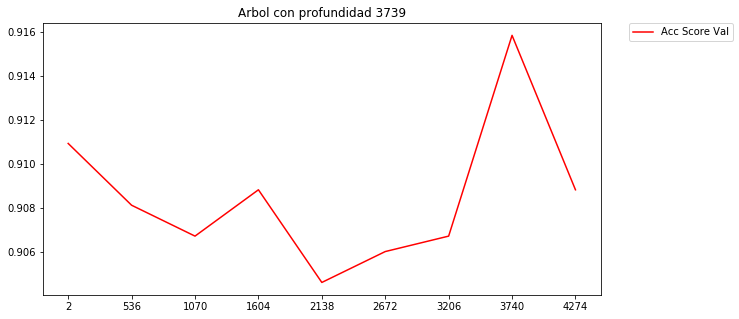

Mejor Acc Score: 0.9158485273492286


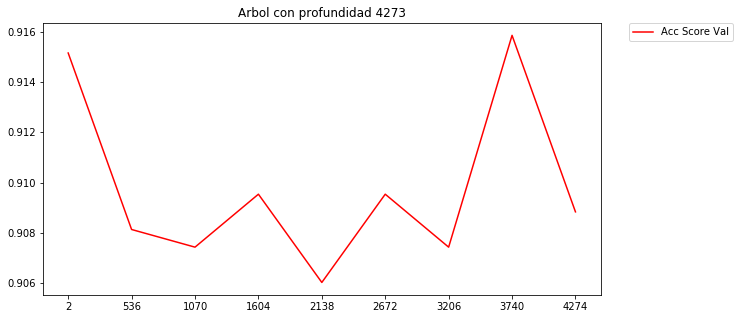

Mejor Acc Score: 0.9158485273492286


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model_unr = DecisionTreeClassifier()
model_unr.fit(features_train,y_train)

accuracy_unr_tree = accuracy_score(y_val, model_unr.predict(features_val))
print("Accuracy score árbol no regularizado:", accuracy_unr_tree)
print("-----------------------------------------------")
#define your regularized tree model
particion = len(y_train)/8
Profundidad = [i for i in range(1,len(y_train)+1,int(particion))]
Samples = [i for i in range(2,len(y_train)+1,int(particion))]

for p in Profundidad:
    accscore_lista = []
    for s in Samples:
        model_reg_try = DecisionTreeClassifier(max_depth = p,
                                          min_samples_split = s)
        model_reg_try.fit(features_train, y_train)
        accscore = accuracy_score(y_val, model_reg_try.predict(features_val))
        accscore_lista.append(accscore)

    plt.figure(figsize=(10,5))
    best_accscore_Tree = max(accscore_lista)

    xi = list(range(1,len(y_train),int(particion)))
    plt.plot(xi, accscore_lista, linestyle='-', color='r', label='Acc Score Val')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(xi,Samples)
    plt.title("Arbol con profundidad "+str(p))
    

    plt.show()
    print("Mejor Acc Score:", best_accscore_Tree)

**Comentario:** Al parecer, el mejor min_samples_split es 3740 para varias profundidades, como se considera muy grande como parámetro (y porque usar este parámetro arroja error al usarse en BaggingClassifier), se escogerá min_samples_split 2 y profundidad 4273

In [11]:
model_reg = DecisionTreeClassifier(max_depth = 4273,
                                  min_samples_split = 2)
model_reg.fit(features_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4273,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

> Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier

estimators = np.arange(1,101,10)

bagging_model_unr_val = []

bagging_model_reg_val = []

#No regularizado
for i in estimators:
    bagging_model_unr = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = i, n_jobs = -1, random_state = 0)
    bagging_model_unr.fit(features_train, y_train)
    accscore = accuracy_score(y_val, bagging_model_unr.predict(features_val))
    bagging_model_unr_val.append(accscore)
    
    base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                           min_samples_split = 2)
    bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = i, n_jobs = -1, random_state = 0)
    bagging_model_reg.fit(features_train, y_train)
    prediccion_reg = bagging_model_reg.predict(features_val)
    accscorereg = accuracy_score(y_val, prediccion_reg)
    bagging_model_reg_val.append(accscorereg)

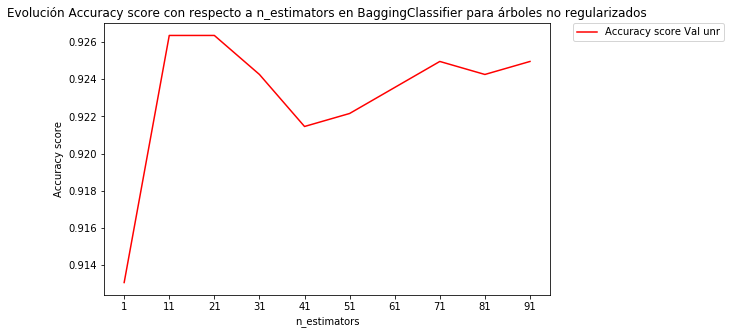

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, bagging_model_unr_val, linestyle='-', color='r', label='Accuracy score Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("Evolución Accuracy score con respecto a n_estimators en BaggingClassifier para árboles no regularizados")
plt.show()

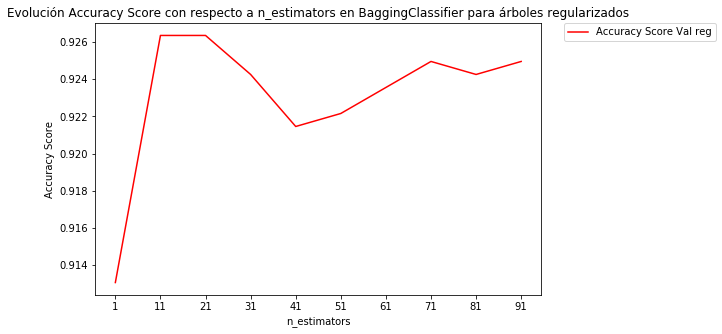

In [15]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, bagging_model_reg_val, linestyle='-', color='r', label='Accuracy Score Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Evolución Accuracy Score con respecto a n_estimators en BaggingClassifier para árboles regularizados")
plt.show()

> Adaboost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

estimators = np.arange(1,101,10)

adaboost_model_unr_val = []

adaboost_model_reg_val = []

for i in estimators:
    adaboost_model_unr = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = i, random_state = 0)
    adaboost_model_unr.fit(features_train, y_train)
    adaboost_model_unr_val.append(accuracy_score(y_val, adaboost_model_unr.predict(features_val)))
    
    base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                           min_samples_split = 2)
    adaboost_model_reg = AdaBoostClassifier(base_estimator = base_model_reg, n_estimators = i, random_state = 0)
    adaboost_model_reg.fit(features_train, y_train)
    adaboost_model_reg_val.append(accuracy_score(y_val, adaboost_model_reg.predict(features_val)))

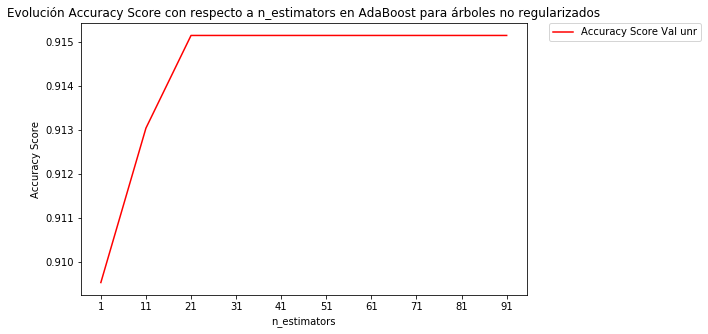

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, adaboost_model_unr_val, linestyle='-', color='r', label='Accuracy Score Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Evolución Accuracy Score con respecto a n_estimators en AdaBoost para árboles no regularizados")
plt.show()

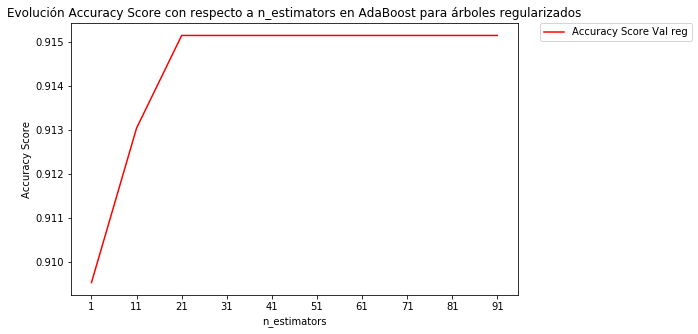

In [18]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, adaboost_model_reg_val, linestyle='-', color='r', label='Accuracy Score Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Evolución Accuracy Score con respecto a n_estimators en AdaBoost para árboles regularizados")
plt.show()

> RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(1,101,10)

randomforest_model_unr_val = []

randomforest_model_reg_val = []

for i in estimators:
    randomforest_model_unr = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 0)
    randomforest_model_unr.fit(features_train, y_train)
    randomforest_model_unr_val.append(accuracy_score(y_val, randomforest_model_unr.predict(features_val)))
    
    randomforest_model_reg = RandomForestClassifier(max_depth = 1603, min_samples_split = 1070, n_estimators = i, n_jobs = -1, random_state = 0)
    randomforest_model_reg.fit(features_train, y_train)
    randomforest_model_reg_val.append(accuracy_score(y_val, randomforest_model_reg.predict(features_val)))

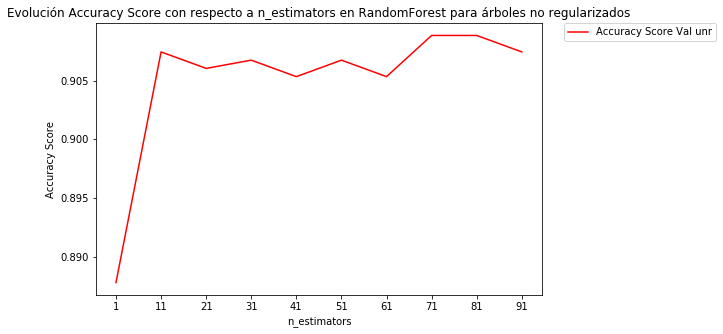

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, randomforest_model_unr_val, linestyle='-', color='r', label='Accuracy Score Val unr')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Evolución Accuracy Score con respecto a n_estimators en RandomForest para árboles no regularizados")
plt.show()

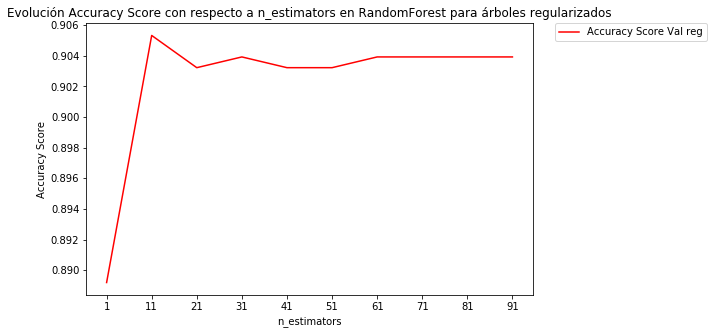

In [22]:
plt.figure(figsize=(8,5))

xi = list(range(len(estimators)))
plt.plot(xi, randomforest_model_reg_val, linestyle='-', color='r', label='Accuracy Score Val reg')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(xi, estimators)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Evolución Accuracy Score con respecto a n_estimators en RandomForest para árboles regularizados")
plt.show()

> Mejor modelo

In [23]:
print("El mejor Accuracy Score obtenido fue con BaggingClassifier para árboles regularizados y n_estimators = 21")

El mejor Accuracy Score obtenido fue con BaggingClassifier para árboles regularizados y n_estimators = 21


In [25]:
base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                        min_samples_split = 2)
bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0)

In [32]:
mejor = max(bagging_model_reg_val)
mejor

0.926367461430575

> Métodos para tratar con imbalanced data

**Resampling Techniques**

*Oversampling minority class*

In [42]:
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1) #Concatena conjunto de entrenamiento
# separate minority and majority classes
no_toxico = X[X.harassment==0]
toxico = X[X.harassment==1]

# upsample minority
toxico_upsampled = resample(toxico,
                          replace=True, # sample with replacement
                          n_samples=len(no_toxico), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_toxico, toxico_upsampled])

In [43]:
y_oversampling = upsampled.harassment
X_oversampling = upsampled.tweet_content

In [44]:
texts_train = [text for text in X_oversampling]
texts_val = [text for text in X_val]

CountVectorizer

In [45]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)

In [49]:
base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                        min_samples_split = 2)
bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0)
bagging_model_reg.fit(features_train, y_oversampling)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4273,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=21, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [51]:
diferencia = accuracy_score(y_val, bagging_model_reg.predict(features_val)) - mejor
diferencia

-0.04207573632538564

**R:** Oversampling no mejora el accuracy score obtenido.

*Undersampling majority class*

In [52]:
no_toxico_downsampled = resample(no_toxico,
                                replace = False, # sample without replacement
                                n_samples = len(toxico), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_toxico_downsampled, toxico])

In [53]:
y_undersampling = downsampled.harassment
X_undersampling = downsampled.tweet_content

In [54]:
texts_train = [text for text in X_undersampling]
texts_val = [text for text in X_val]

CountVectorizer

In [55]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)

In [56]:
base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                        min_samples_split = 2)
bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0)
bagging_model_reg.fit(features_train, y_undersampling)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4273,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=21, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [57]:
diferencia = accuracy_score(y_val, bagging_model_reg.predict(features_val)) - mejor
diferencia

-0.0729312762973352

**R:** Oversampling no mejora el accuracy score obtenido.

*Generate synthetic samples*

In [58]:
#conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
y = df.harassment
X = df.tweet_content
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)

#X_train, y_train = sm.fit_sample(X_train, y_train)

In [59]:
texts_train = [text for text in X_train]
texts_val = [text for text in X_val]

In [60]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)

features_train, y_train = sm.fit_sample(features_train, y_train)

C:\Users\Matias\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                        min_samples_split = 2)
bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0)
bagging_model_reg.fit(features_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4273,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=21, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [62]:
diferencia = accuracy_score(y_val, bagging_model_reg.predict(features_val)) - mejor
diferencia

-0.019635343618513268

# Conclusión

Ningún método para tratar imbalanced data mejoró el accuracy score obtenido. Por lo cual se subirá a kaggle la respuesta del BaggingClassifier para árboles regularizados y n_estimators = 21

In [63]:
base_model_reg = DecisionTreeClassifier(max_depth = 4273,
                                        min_samples_split = 2)
bagging_model_reg = BaggingClassifier(base_estimator = base_model_reg, n_estimators = 21, n_jobs = -1, random_state = 0)

In [64]:
y = df.harassment
X = df.tweet_content
X_test = df_test.tweet_content

In [65]:
texts_train = [text for text in X]
texts_test = [text for text in X_test]

CountVectorizer

In [66]:
import numpy as np
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from astropy.table import Table, Column

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train) #diccionario de todas las palabras
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

In [67]:
bagging_model_reg.fit(features_train, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4273,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=21, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [68]:
y_pred = bagging_model_reg.predict(features_test)

In [69]:
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)